In [913]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [914]:
data = pd.read_excel("50_StartUp.xlsx")
df=data.copy()

In [915]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [917]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [918]:
df.shape

(50, 5)

In [919]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [920]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [921]:
state_dic={"New York":0,"California":1,"Florida":2}

In [922]:
df['State'] = df['State'].map(state_dic)

In [923]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


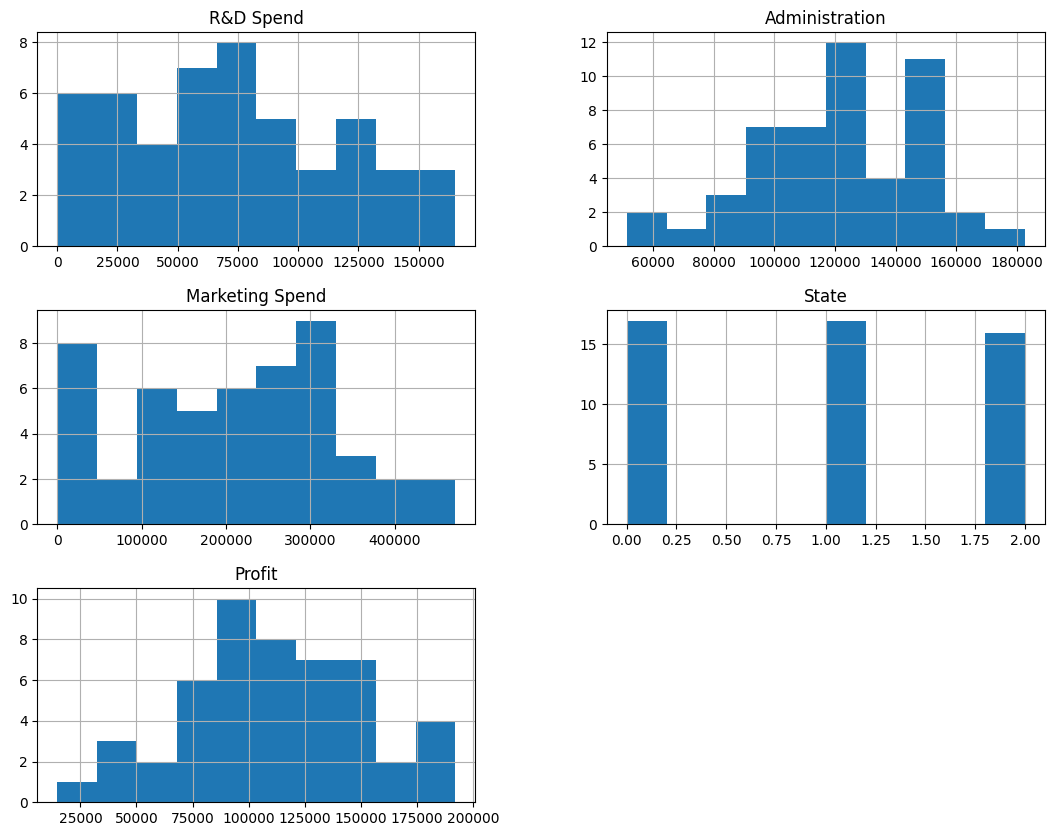

In [924]:
df.hist(figsize = (13,10))
plt.show()

In [925]:
corr=df.corr()
corr

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


<Axes: >

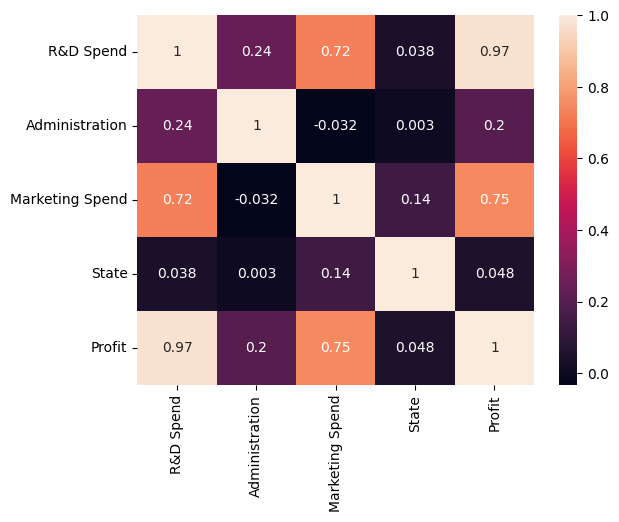

In [927]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

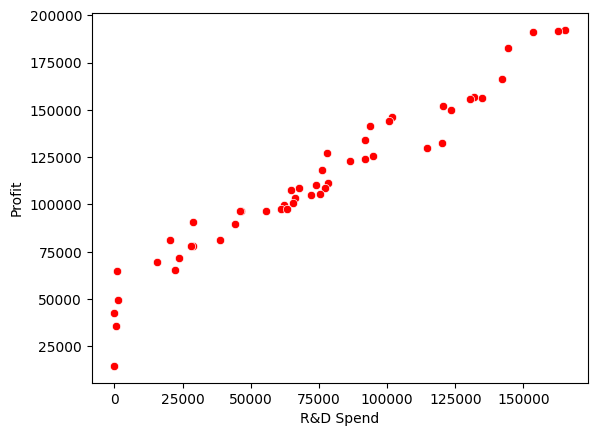

In [928]:
sns.scatterplot(x="R&D Spend", y = "Profit" , data=df , color="red")

In [929]:
x=df.drop("Profit",axis=1)
y=df["Profit"]

In [930]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [931]:
ml=LinearRegression()

In [932]:
reg=ml.fit(x_train,y_train)

In [933]:
y_pred=ml.predict(x_test)
y_pred

array([ 83454.2387845 , 114272.52483614, 118071.14247018,  95950.64561601,
       100167.0334594 ,  57066.72946949,  76799.81449824, 129171.99221681,
       103032.8415621 , 113086.53239908,  87877.57249461, 177176.79050321,
       132834.82322078,  99789.09649446, 154421.48898386])

In [934]:
dat=pd.DataFrame( {"y_test":y_test,"y_pred":y_pred,"diff between y_test&y_pred": abs(y_test -y_pred)})
dat

,y_test,y_pred,diff between y_test&y_pred
39,81005.76,83454.238784,2448.478784
26,105733.54,114272.524836,8538.984836
22,110352.25,118071.142470,7718.892470
31,97483.56,95950.645616,1532.914384
29,101004.64,100167.033459,837.606541
43,69758.98,57066.729469,12692.250531
41,77798.83,76799.814498,999.015502
17,125370.37,129171.992217,3801.622217
25,107404.34,103032.841562,4371.498438
23,108733.99,113086.532399,4352.542399


In [935]:
MSE=mean_absolute_error(y_test,y_pred)
MSE

6642.17418727888

In [936]:
reg.score(x_train, y_train)

0.9559166212657784

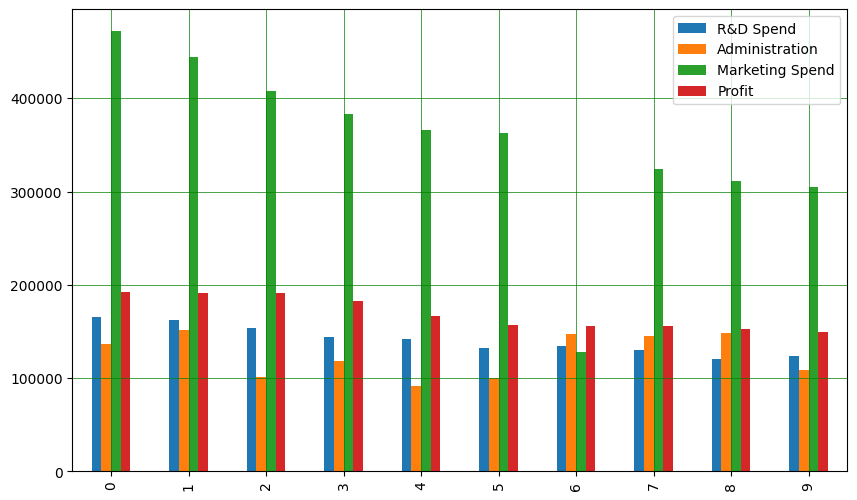

In [937]:
df1 = data.head(10)
df1.plot(kind="bar", figsize=(10,6))
plt.grid(which="major",linestyle="-", linewidth="0.5",color="green")

plt.show()

In [938]:
print('Intercept of the model:\n',ml.intercept_)
print("="*50)
print('Coefficient of the line:\n',ml.coef_)

Intercept of the model:
 45929.268844197286
Coefficient of the line:
 [ 8.33625797e-01 -2.13813745e-02  2.63153115e-02  2.55071136e+03]
